CIFAR-10 dataset, 10 classes with different viecles and animals

Convolutional Neural Networks

Structure be like:

CONV RELU CONV POOL CONV RELU CONV RELU POOL FC

Initial image * Filter = Resulting image

Max Pooling: A way to compress the image maybe from 100x100 to 10x10

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import numpy as np

device = torch.device('cuda')

In [2]:
# hyperpara

num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

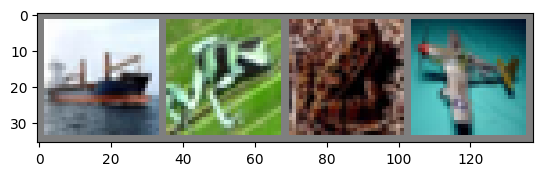

In [11]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
images.shape
# 4 = batch_size, 3 = color channels, 32x32 = img size

torch.Size([4, 3, 32, 32])

In [23]:
# play with conv layer

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
x = conv1(images)
print("x: ", x.shape)
# 28 = ((Width - Filter + 2*Padding) / Stride )+1 = ((32 - 5 + 2*0) / 1) + 1
xx = pool(x)
print("xx: ", xx.shape)
# 14 = 28 / 2
xxx = conv2(xx)
print("xxx: ", xxx.shape)
# 10 = ((14 - 5 + 2*0) / 1) + 1
xxxx = pool(xxx)
print("xxxx: ", xxxx.shape)
# 5 = 10 / 2

x:  torch.Size([4, 6, 28, 28])
xx:  torch.Size([4, 6, 14, 14])
xxx:  torch.Size([4, 16, 10, 10])
xxxx:  torch.Size([4, 16, 5, 5])


In [29]:
class net(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(net,self).__init__()
        self.con1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.con2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120)   # need flatten
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = F.relu(self.con1(x))
        x = self.pool(x)
        x = F.relu(self.con2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)  # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
model = net().to(device)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
n_total_steps = len(train_loader)

In [32]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] -> [4, 3, 1024]
        # input_layer: 3 input channels, 6 output channels, 5 kernel size

        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 ==0:
            print(f'Epoch {epoch+1}/ {num_epochs}, StEp {i+1}/ {n_total_steps}, Loss: {loss.item():.4f}')

print("Finished Training")


Epoch 1/ 4, StEp 2000/ 12500, Loss: 2.2613
Epoch 1/ 4, StEp 4000/ 12500, Loss: 2.3083
Epoch 1/ 4, StEp 6000/ 12500, Loss: 2.3232
Epoch 1/ 4, StEp 8000/ 12500, Loss: 2.2797
Epoch 1/ 4, StEp 10000/ 12500, Loss: 2.1751
Epoch 1/ 4, StEp 12000/ 12500, Loss: 2.1037
Epoch 2/ 4, StEp 2000/ 12500, Loss: 2.2198
Epoch 2/ 4, StEp 4000/ 12500, Loss: 1.8309
Epoch 2/ 4, StEp 6000/ 12500, Loss: 2.1505
Epoch 2/ 4, StEp 8000/ 12500, Loss: 1.0579
Epoch 2/ 4, StEp 10000/ 12500, Loss: 1.5682
Epoch 2/ 4, StEp 12000/ 12500, Loss: 1.3042
Epoch 3/ 4, StEp 2000/ 12500, Loss: 1.4885
Epoch 3/ 4, StEp 4000/ 12500, Loss: 1.3471
Epoch 3/ 4, StEp 6000/ 12500, Loss: 1.8615
Epoch 3/ 4, StEp 8000/ 12500, Loss: 1.8601
Epoch 3/ 4, StEp 10000/ 12500, Loss: 1.7416
Epoch 3/ 4, StEp 12000/ 12500, Loss: 1.2317
Epoch 4/ 4, StEp 2000/ 12500, Loss: 1.0485
Epoch 4/ 4, StEp 4000/ 12500, Loss: 2.0533
Epoch 4/ 4, StEp 6000/ 12500, Loss: 0.8914
Epoch 4/ 4, StEp 8000/ 12500, Loss: 0.8369
Epoch 4/ 4, StEp 10000/ 12500, Loss: 1.6778
Epoc

In [43]:
# prediction

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value, index)
        _, preds = torch.max(outputs, 1)
        n_samples += labels.size(0) # labels: [batch_size, 1]
        n_correct += (preds == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = preds[i]
            if label == pred :
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy: 46.6 %
Accuracy of plane: 47.5 %
Accuracy of car: 59.8 %
Accuracy of bird: 16.8 %
Accuracy of cat: 34.9 %
Accuracy of deer: 40.3 %
Accuracy of dog: 39.0 %
Accuracy of frog: 65.5 %
Accuracy of horse: 52.4 %
Accuracy of ship: 52.8 %
Accuracy of truck: 57.0 %
